 ## MITA CAPSTONE PROJECT  BY AKSHATA CHAVAN
#                        BOSTON HOUSE PRICE PREDICTION

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#warnings.filterwarnings('ignore')

In [2]:
df = pd. read_excel('C:/Users/chava/Desktop/MITACapstoneProject/bostonfinaldata.xlsx')


### The Dataframe df contains following columns

* TOWN a factor with levels given by town names
* TOWNN# a numeric vector corresponding to TOWN
* TRACT a numeric vector of tract ID numbers
* LON a numeric vector of tract point longitudes in decimal degrees
* LAT a numeric vector of tract point latitudes in decimal degrees
* MEDV a numeric vector of median values of owner-occupied housing in USD 1000
* CMEDV a numeric vector of corrected median values of owner-occupied housing in USD 1000
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per 10,000usd
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT % lower status of the population

In [4]:
df.head(5)

,OBS.,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,...,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,...,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,2,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,...,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,3,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,...,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,4,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,...,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,5,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,...,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [5]:
df.drop(columns=['OBS.'], axis=0, inplace=True)
df.head()

,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,0,2011,-70.955,42.2550,24.0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,1,2021,-70.950,42.2875,21.6,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,1,2022,-70.936,42.2830,34.7,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,2,2031,-70.928,42.2930,33.4,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,2,2032,-70.922,42.2980,36.2,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [6]:
df.describe()

,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,47.531621,2700.355731,-71.056389,42.216440,22.532806,22.528854,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,27.571401,1380.036830,0.075405,0.061777,9.197104,9.182176,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.000000,1.000000,-71.289500,42.030000,5.000000,5.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,26.250000,1303.250000,-71.093225,42.180775,17.025000,17.025000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,42.000000,3393.500000,-71.052900,42.218100,21.200000,21.200000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,78.000000,3739.750000,-71.019625,42.252250,25.000000,25.000000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,91.000000,5082.000000,-70.810000,42.381000,50.000000,50.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   TOWN#    506 non-null    int64  
 2   TRACT    506 non-null    int64  
 3   LON      506 non-null    float64
 4   LAT      506 non-null    float64
 5   MEDV     506 non-null    float64
 6   CMEDV    506 non-null    float64
 7   CRIM     506 non-null    float64
 8   ZN       506 non-null    float64
 9   INDUS    506 non-null    float64
 10  CHAS     506 non-null    int64  
 11  NOX      506 non-null    float64
 12  RM       506 non-null    float64
 13  AGE      506 non-null    float64
 14  DIS      506 non-null    float64
 15  RAD      506 non-null    int64  
 16  TAX      506 non-null    int64  
 17  PTRATIO  506 non-null    float64
 18  B        506 non-null    float64
 19  LSTAT    506 non-null    float64
dtypes: float64(14), int64(5), object(1)
memory usage: 79.2

**Preprocessing the dataset**


In [10]:
#checking null values
df.isnull().sum()

TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
df.shape
#checking shape of dataframe

(506, 20)

In [12]:
df.dtypes


TOWN        object
TOWN#        int64
TRACT        int64
LON        float64
LAT        float64
MEDV       float64
CMEDV      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

In [13]:
df.isnull().sum()
#checking for null values

TOWN       0
TOWN#      0
TRACT      0
LON        0
LAT        0
MEDV       0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [14]:
df[df.isnull().any(axis=1)]
#Rows with missing values

,TOWN,TOWN#,TRACT,LON,LAT,MEDV,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT


**Explorator Data Analysis**

In [15]:
df.TOWN.unique()


array(['Nahant', 'Swampscott', 'Marblehead', 'Salem', 'Lynn', 'Sargus',
       'Lynnfield', 'Peabody', 'Danvers', 'Middleton', 'Topsfield',
       'Hamilton', 'Wenham', 'Beverly', 'Manchester', 'North Reading',
       'Wilmington', 'Burlington', 'Woburn', 'Reading', 'Wakefield',
       'Melrose', 'Stoneham', 'Winchester', 'Medford', 'Malden',
       'Everett', 'Somerville', 'Cambridge', 'Arlington', 'Belmont',
       'Lexington', 'Bedford', 'Lincoln', 'Concord', 'Sudbury', 'Wayland',
       'Weston', 'Waltham', 'Watertown', 'Newton', 'Natick', 'Framingham',
       'Ashland', 'Sherborn', 'Brookline', 'Dedham', 'Needham',
       'Wellesley', 'Dover', 'Medfield', 'Millis', 'Norfolk', 'Walpole',
       'Westwood', 'Norwood', 'Sharon', 'Canton', 'Milton', 'Quincy',
       'Braintree', 'Randolph', 'Holbrook', 'Weymouth', 'Cohasset',
       'Hull', 'Hingham', 'Rockland', 'Hanover', 'Norwell', 'Scituate',
       'Marshfield', 'Duxbury', 'Pembroke', 'Boston Allston-Brighton',
       'Boston Bac

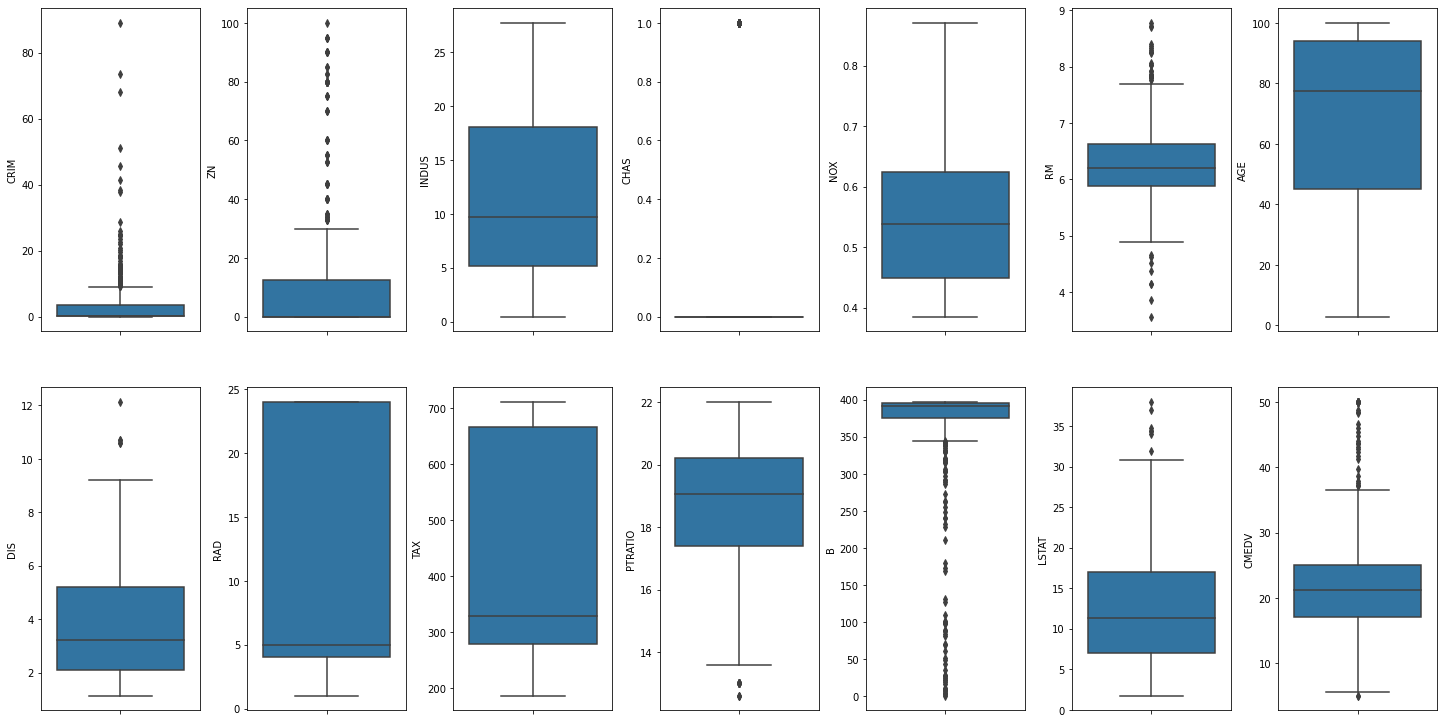

In [16]:
#Create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

sns.boxplot(y= 'CRIM', data=df, ax=ax[0])
sns.boxplot(y= 'ZN', data=df, ax=ax[1])
sns.boxplot(y= 'INDUS', data=df, ax=ax[2])
sns.boxplot(y= 'CHAS', data=df, ax=ax[3])
sns.boxplot(y= 'NOX', data=df, ax=ax[4])
sns.boxplot(y= 'RM', data=df, ax=ax[5])
sns.boxplot(y= 'AGE', data=df, ax=ax[6])
sns.boxplot(y= 'DIS', data=df, ax=ax[7])
sns.boxplot(y= 'RAD', data=df, ax=ax[8])
sns.boxplot(y= 'TAX', data=df, ax=ax[9])
sns.boxplot(y= 'PTRATIO', data=df, ax=ax[10])
sns.boxplot(y= 'B', data=df, ax=ax[11])
sns.boxplot(y= 'LSTAT', data=df, ax=ax[12])
sns.boxplot(y= 'CMEDV', data=df, ax=ax[13])
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [17]:
df2= df.drop(['TOWN','TOWN#','TRACT','LON','LAT','MEDV'], axis=1)

In [18]:
df2.head()

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


C:\Users\chava\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


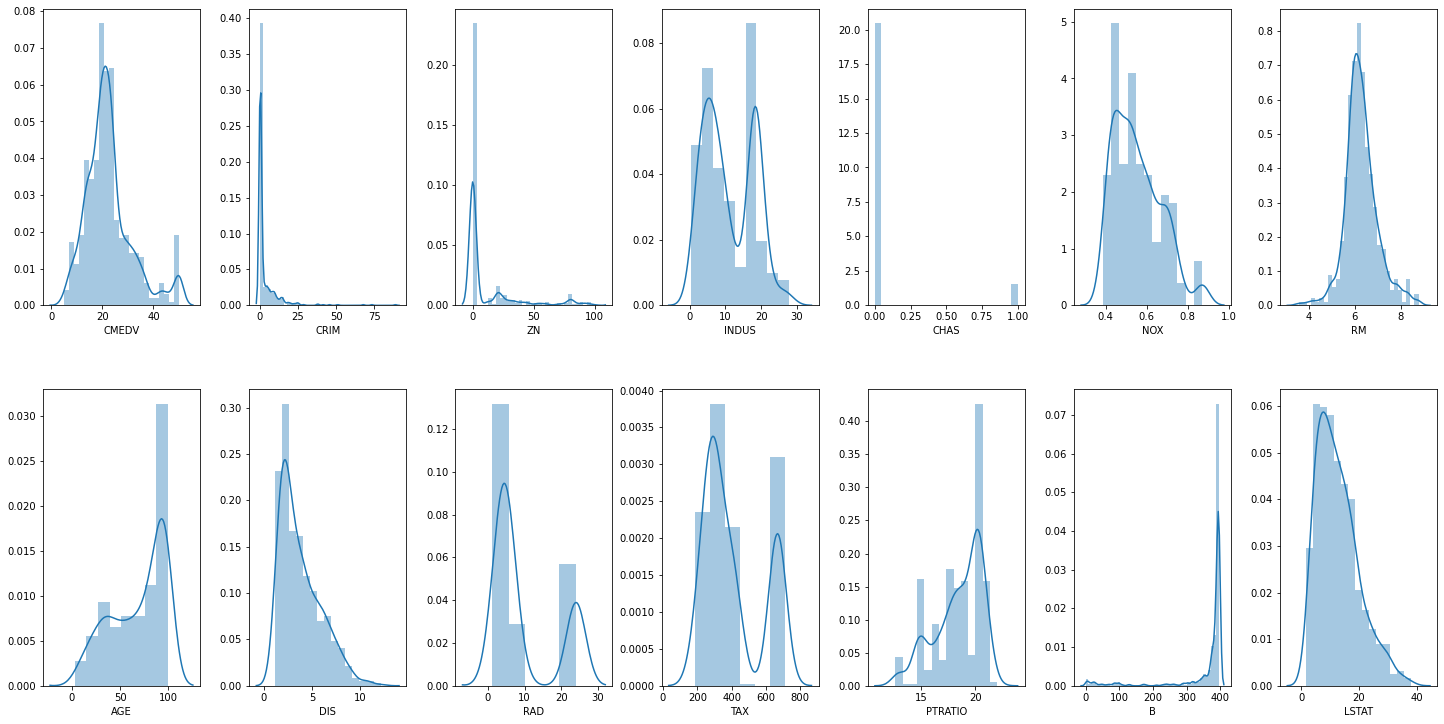

In [19]:
#Create DIST plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df2.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

*Min-Max Normalization*

In [20]:
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(df2[col])
    maximum = max(df2[col])
    df2[col] = (df2[col] - minimum) / (maximum - minimum)

C:\Users\chava\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


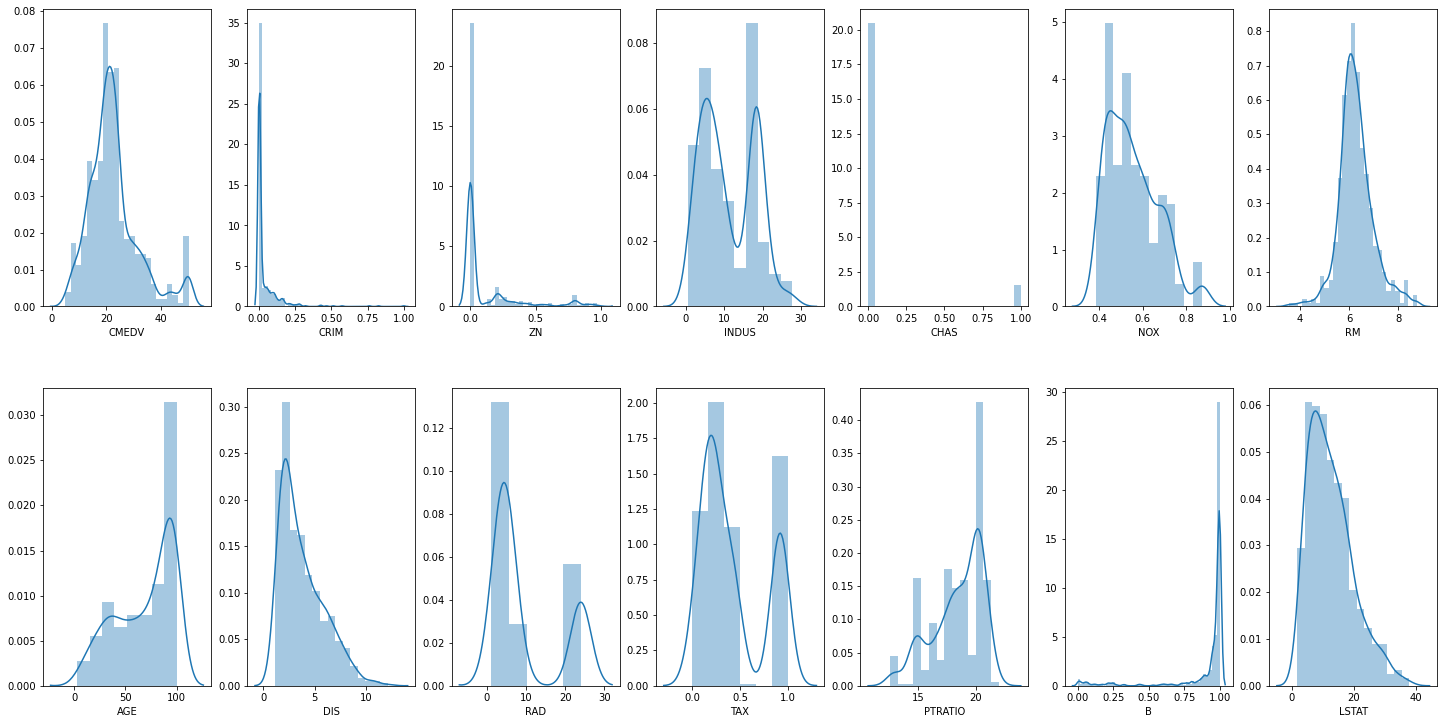

In [21]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df2.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [22]:
# standardization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(df2[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [23]:
for col in cols:
    df2[col] = scaled_cols[col]

C:\Users\chava\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


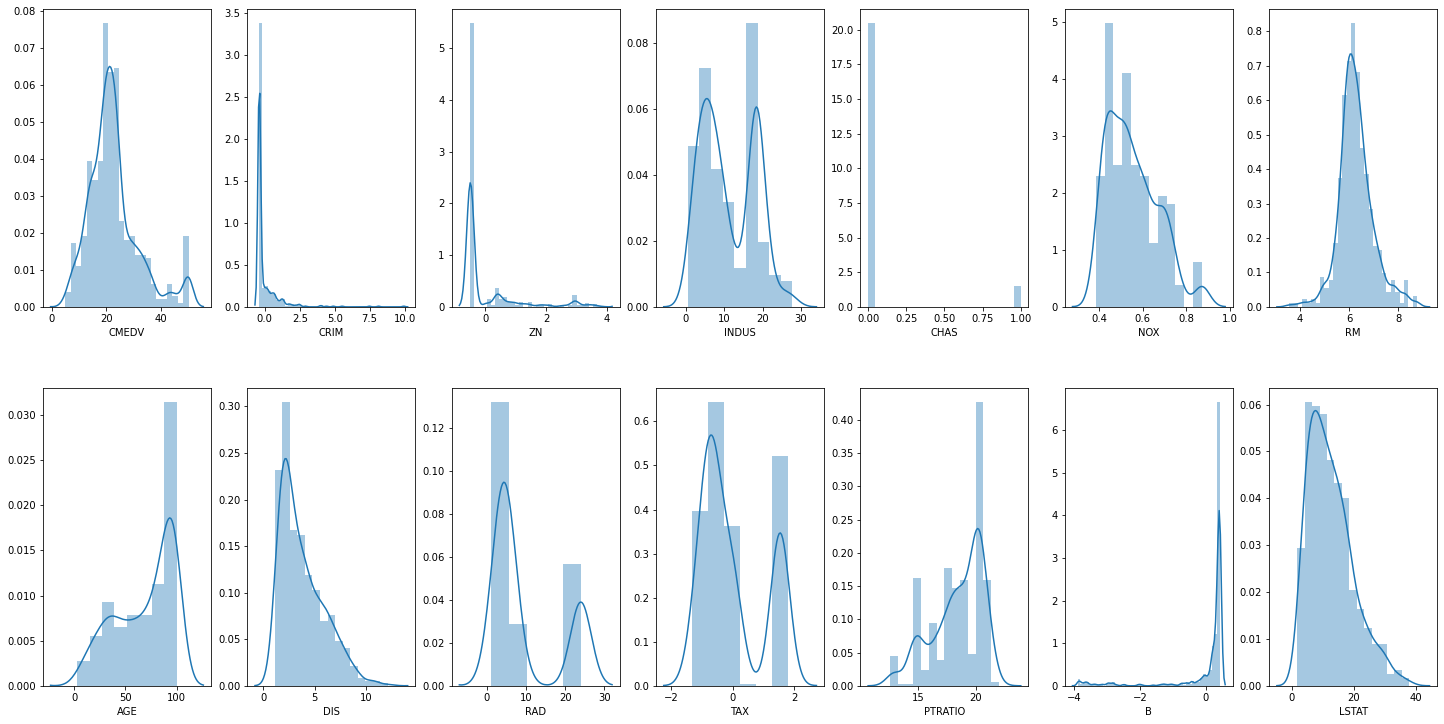

In [24]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df2.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

    *Coorelation Matrix*

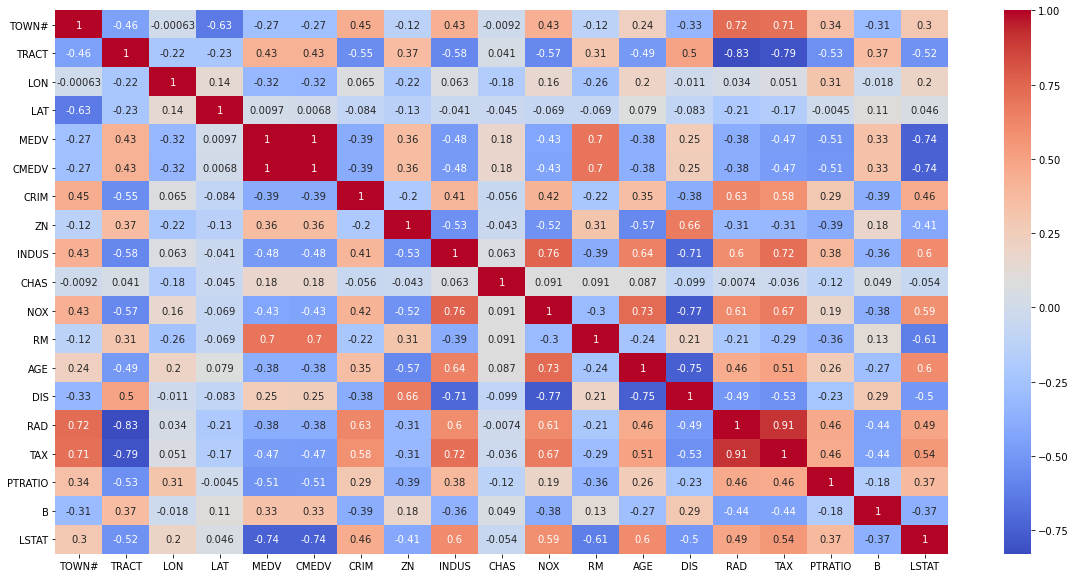

In [25]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

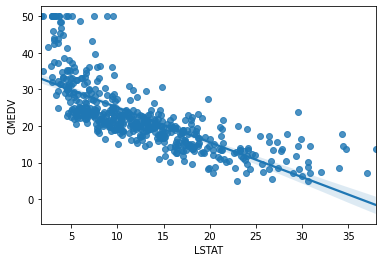

In [26]:
    sns.regplot(y=df['CMEDV'],x=df['LSTAT'])

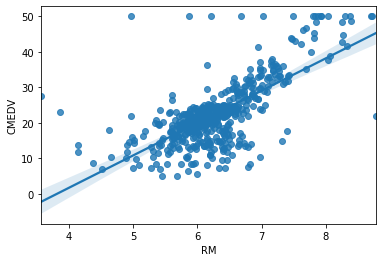

In [27]:
    sns.regplot(y=df['CMEDV'],x=df['RM'])

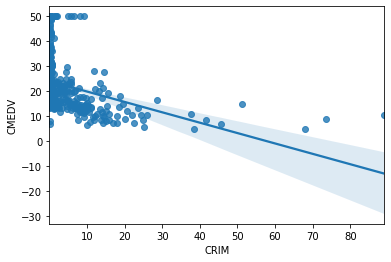

In [28]:
    sns.regplot(y=df['CMEDV'],x=df['CRIM'])

In [29]:
# Spliting target variable and independent variables
X = df2.drop(['CMEDV'], axis = 1)
y = df['CMEDV']

In [30]:
# Splitting to training and testing data

from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

# Linear Regression

In [31]:
#Linear regression begins
#Training the model


# Import library for linear regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets 
lm.fit(X_train, y_train)



LinearRegression()

In [32]:
# Value of y intercept
lm.intercept_

34.04956690327636

In [33]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,CRIM,-1.04043
1,ZN,1.31891
2,INDUS,-0.00511846
3,CHAS,4.72643
4,NOX,-14.6705
5,RM,3.27964
6,AGE,-0.0042343
7,DIS,-1.57465
8,RAD,0.327912
9,TAX,-2.43257


In [34]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [108]:
from sklearn import metrics
cv_score = cross_val_score(lm, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

In [109]:
 print('CV Score:', cv_score)

CV Score: 20.641366526691364


In [38]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7498677078772433
Adjusted R^2: 0.7403038261196085
MAE: 3.061163694239879
MSE: 18.780483551684817
RMSE: 4.333645526768983


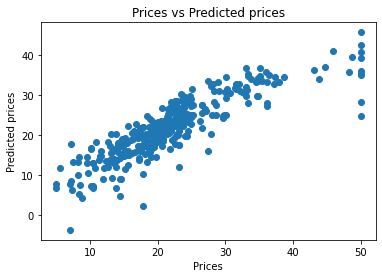

In [39]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

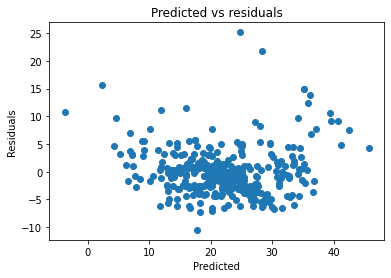

In [40]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

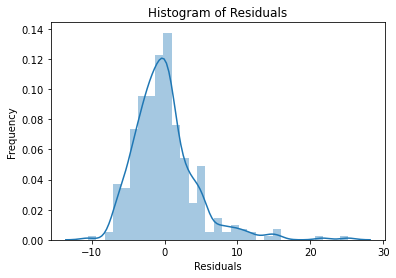

In [41]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### For test data

In [42]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [43]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7166709914982023
Adjusted R^2: 0.6899805776538301
MAE: 3.823119115402231
MSE: 29.416508732515307
RMSE: 5.423698805475403


In [110]:
cv_score1 = cross_val_score(lm, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
cv_score1 = np.abs(np.mean(cv_score1))
print('CV Score:', cv_score1)

CV Score: 31.75600637616059


# Random Forest Regressor

In [47]:
#Importing Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

#Creating Random Forest Regressor
reg = RandomForestRegressor()


#Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [48]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [49]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.980456226162348
Adjusted R^2: 0.9797089642214966
MAE: 0.8155564971751416
MSE: 1.4673895960451977
RMSE: 1.2113585745125997


In [111]:
cv_score = cross_val_score(reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))

In [112]:
 print('CV Score:', cv_score)

CV Score: 31.23542592446512


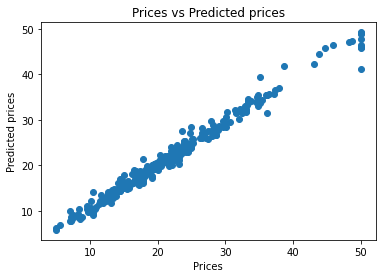

In [52]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

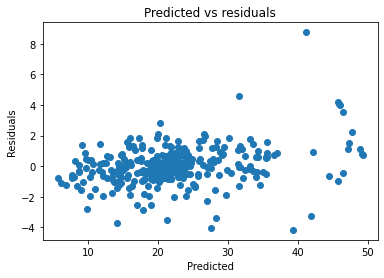

In [54]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

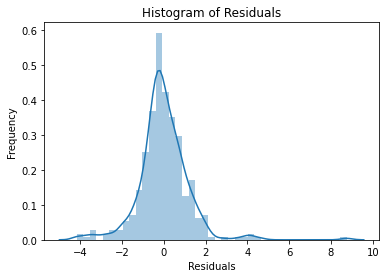

In [55]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### For test data

In [56]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [57]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8281655045674884
Adjusted R^2: 0.8119781970267446
MAE: 2.4975394736842107
MSE: 17.840640328947362
RMSE: 4.2238182168444895


In [113]:
cv_score2 = cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
cv_score2 = np.abs(np.mean(cv_score2))
print('CV Score:', cv_score2)

CV Score: 56.86633055441839


# SVM Regressor

In [59]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train the model

In [65]:
# Import SVM Regressor
from sklearn import svm

# Create a SVM Regressor
svmreg = svm.SVR()

In [83]:
#Train the model using the training sets
svmreg.fit(X_train, y_train)

SVR()

In [67]:
# Model prediction on train data
y_pred = svmreg.predict(X_train)

In [68]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6459011785476183
Adjusted R^2: 0.6323621059626743
MAE: 2.890924651825334
MSE: 26.58651961936111
RMSE: 5.1562117508264835


In [114]:
cv_score = cross_val_score(svmreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)

CV Score: 31.23542592446512


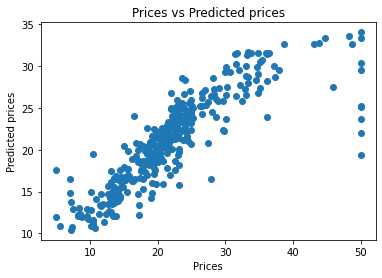

In [64]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

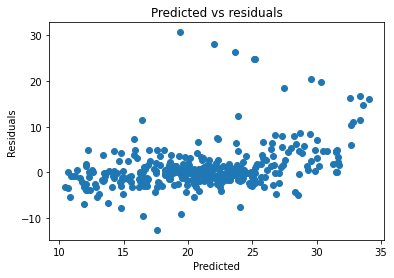

In [71]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

### For test data

In [116]:
# Predicting Test data with the model
y_test_pred = svmreg.predict(X_test)

In [117]:
# Model Evaluation
acc_svm = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_svm)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.5929059848240764
Adjusted R^2: 0.5545565486118518
MAE: 3.6977276882644863
MSE: 42.26635569615985
RMSE: 6.5012580087364515


In [118]:
cv_score3 = cross_val_score(reg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
cv_score3 = np.abs(np.mean(cv_score3))
print('CV Score:', cv_score3)

CV Score: 56.86633055441839


# XGBoost Regressor

### Training the model

In [79]:
!pip install xgboost



In [82]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
xgbreg = XGBRegressor()

# Train the model using the training sets 
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Evaluation

In [84]:
# Model prediction on train data
y_pred = xgbreg.predict(X_train)

In [85]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9999971320203871
Adjusted R^2: 0.9999970223623431
MAE: 0.010095208378161484
MSE: 0.00021533422769623206
RMSE: 0.014674270942579467


In [119]:
cv_score = cross_val_score(xgbreg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
cv_score = np.abs(np.mean(cv_score))
print('CV Score:', cv_score)

CV Score: 11.763898465702102


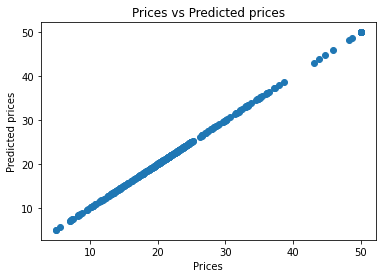

In [87]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

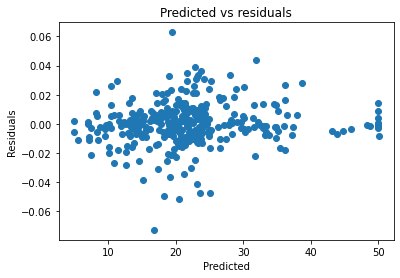

In [88]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

For test data

In [89]:
#Predicting Test data with the model
y_test_pred = xgbreg.predict(X_test)

In [90]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8681414253130463
Adjusted R^2: 0.855719965378768
MAE: 2.239231865029586
MSE: 13.690158075399424
RMSE: 3.700021361478799


In [121]:
cv_score4 = cross_val_score(xgbreg, X_test, y_test, scoring='neg_mean_squared_error', cv=5)
cv_score4 = np.abs(np.mean(cv_score4))
print('CV Score:', cv_score4)

CV Score: 16.347439795085897


### Evaluating all the models together

In [92]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'Support Vector Machines'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100, acc_svm*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,86.814143
1,Random Forest,82.816550
0,Linear Regression,71.667099
3,Support Vector Machines,59.290598


In [122]:
models1 = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Support Vector Machines', 'XGBoost'],
    'CV-Score': [cv_score1, cv_score2, cv_score3, cv_score4]})
models1.sort_values(by='CV-Score', ascending=True)

,Model,CV-Score
3,XGBoost,16.347440
0,Linear Regression,31.756006
1,Random Forest,56.866331
2,Support Vector Machines,56.866331
